# Hessian

## Preamble

In [13]:
%run ~/.jupyter/config.ipy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
import autograd.numpy as np
from autograd import grad, jacobian, hessian

import matplotlib.pyplot as plt

In [41]:
assert "autograd" in np.__file__ # Need to make sure that we get the correct numpy - my config might import the default one.

# What's that Hessian do?

The local approximation to some function f is given by the Taylor expansion:

$$
f(x + a) = f(x) + f'(x)\,a + \frac{1}{2} f''(x)\, x^2
$$

or in two dimensions
$$
f(\vec{x} + \vec{a}) = f(\vec{x}) + \vec{a}^{T} \nabla{}\!f(\vec{x}) + \vec{a}^{T} \nabla{}^{2}\! f(\vec{x}) \vec{a}
$$

where $\nabla{}^{2}$ is the hessian matrix.

In [241]:
def taylor_1d(a, val, der, der2):
    return val + der * a + 0.5 * der2 * a**2

def taylor_2d(grid, x0, val, grad, hess):
    grid = np.reshape(grid, (2, -1))
    res = np.zeros_like(grid[0])
    for i, a in enumerate(grid.T):
        a = a - x0
        res[i] = val + np.dot(grad, a) + 0.5 * np.matmul(a.T, np.matmul(hess, a))
    res = np.reshape(res, (200, 200))
    return res

def plot_hess(grad, hess):
    lim = 2
    x = np.linspace(-lim, lim, num=200)
    y = np.linspace(-lim, lim, num=200)
    grid = np.array(np.meshgrid(x, y))

    x0 = np.array([0, 0])
    f = 0

    fig, ax = plt.subplots()
    fig.set_size_inches((fig.get_size_inches()[1], fig.get_size_inches()[1]))
    
    cs = ax.contour(grid[0], grid[1], taylor_2d(
        grid, x0, 0, grad, hess), cmap="Greys")
    ax.clabel(cs, fontsize="x-small")
    ax.scatter(x0[0], x0[1])

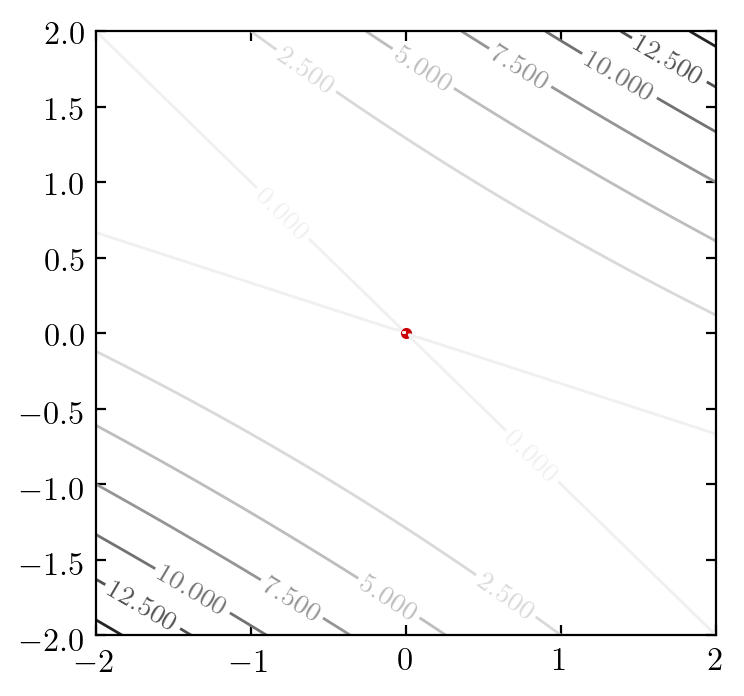

In [250]:
grad = np.array([0, 0])
hess = np.array([
    [1, 2],
    [2, 3]],
)
plot_hess(grad, hess)

# 1d

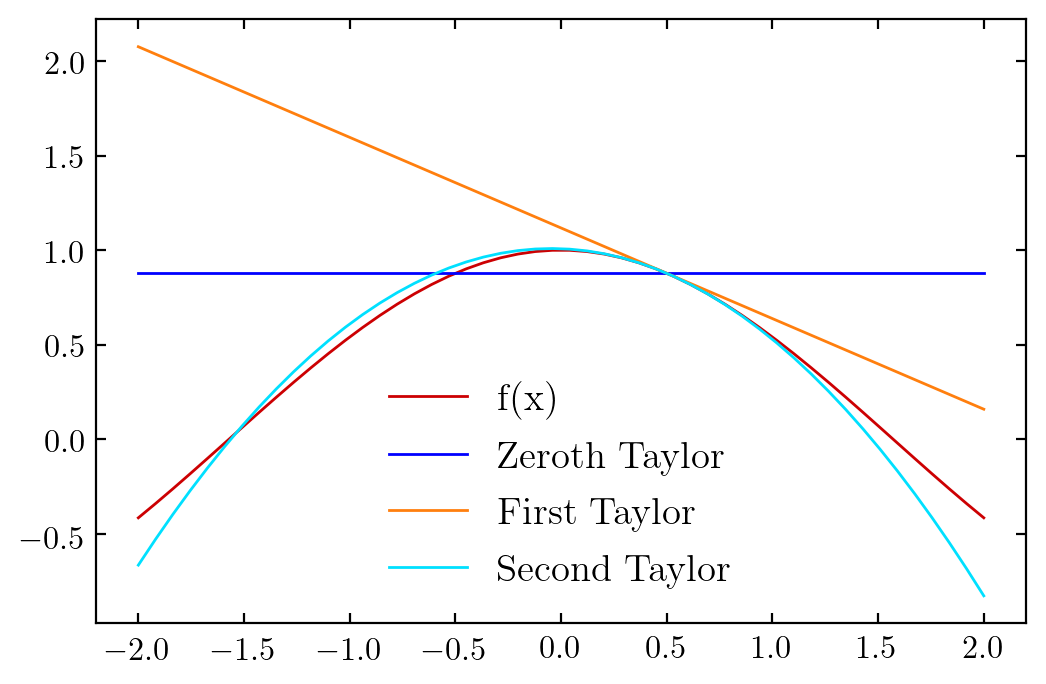

In [150]:
f = np.cos
df = grad(f)
df2 = grad(df)

_, ax = plt.subplots()

x = np.linspace(-2, 2)
x0 = 0.5

ax.plot(x, f(x), label="f(x)")
ax.plot(x, taylor_1d(x-x0, f(x0), 0, 0), label="Zeroth Taylor")
ax.plot(x, taylor_1d(x-x0, f(x0), df(x0), 0), label="First Taylor")
ax.plot(x, taylor_1d(x-x0, f(x0), df(x0), df2(x0)), label="Second Taylor")
ax.legend()

# 2d

In [189]:
x = np.linspace(-1, 1, num=200)
y = np.linspace(-1, 1, num=200)
grid = np.array(np.meshgrid(x, y))

/home/christopher/.virtualenvs/learning/lib/python3.7/site-packages/autograd/numpy/numpy_vjps.py:444: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return lambda g: g[idxs]


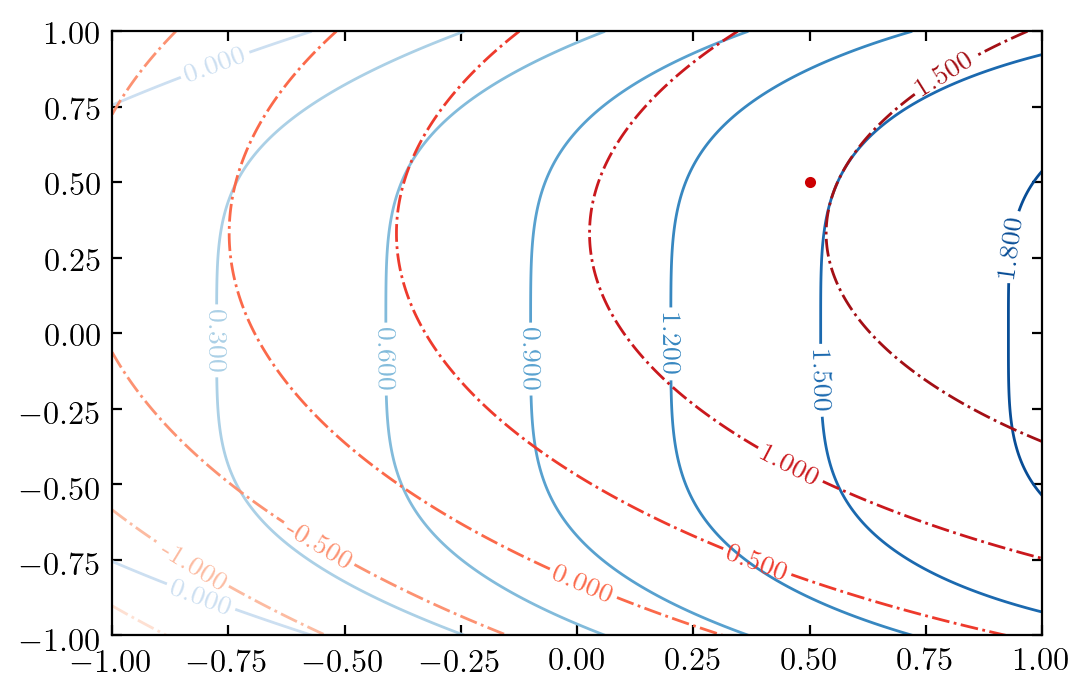

In [191]:
f = lambda x: np.sin(x[0,]) + np.cos(x[1,]**2)
grad_f = jacobian(f)
hess_f = hessian(f)

x0 = np.array([0.5, 0.5])


_, ax = plt.subplots()
cs = ax.contour(grid[0], grid[1], f(grid), cmap="Blues")
ax.clabel(cs, fontsize="x-small")
cs = ax.contour(grid[0], grid[1], taylor_2d(grid, x0, f(x0), grad_f(x0), hess_f(x0)), cmap="Reds", linestyles="-.")
ax.clabel(cs, fontsize="x-small")
ax.scatter(x0[0], x0[1])